# Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


## TABLE OF CONTENTS 

*Click to jump to matching Markdown Header.*<br><br>

<font size=3rem>
    
- **[Introduction](#INTRODUCTION)<br>**
- **[OBTAIN](#OBTAIN)**<br>
- **[SCRUB](#SCRUB)**<br>
- **[EXPLORE](#EXPLORE)**<br>
- **[MODEL](#MODEL)**<br>
- **[iNTERPRET](#iNTERPRET)**<br>
- **[Conclusions/Recommendations](#CONCLUSIONS-&-RECOMMENDATIONS)<br>**
</font>
___

# INTRODUCTION

Using the King County House Sales dataset, we will *predict* the sale price of houses as accurately as possible based on all the values we are given.



# OBTAIN

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 100

In [5]:
kings_county_sales_df = pd.read_csv('kc_house_data.csv', index_col='id')
kings_county_sales_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,,
7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [6]:
kings_county_sales_df.shape

(21597, 20)

In [7]:
kings_county_sales_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21597 entries, 7129300520 to 1523300157
Data columns (total 20 columns):
date             21597 non-null object
price            21597 non-null float64
bedrooms         21597 non-null int64
bathrooms        21597 non-null float64
sqft_living      21597 non-null int64
sqft_lot         21597 non-null int64
floors           21597 non-null float64
waterfront       19221 non-null float64
view             21534 non-null float64
condition        21597 non-null int64
grade            21597 non-null int64
sqft_above       21597 non-null int64
sqft_basement    21597 non-null object
yr_built         21597 non-null int64
yr_renovated     17755 non-null float64
zipcode          21597 non-null int64
lat              21597 non-null float64
long             21597 non-null float64
sqft_living15    21597 non-null int64
sqft_lot15       21597 non-null int64
dtypes: float64(8), int64(10), object(2)
memory usage: 3.5+ MB


In [19]:
kings_county_sales_df['waterfront'].value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

## Things to consider
* May want to convert date column to data datatype
* sqr foot basement should probably be a float instead of string
* Get rid of null values
* Separate categorical and continuous columns

# SCRUB

### Modify necessary datatypes

In [17]:
kings_county_sales_df['date'] = pd.to_datetime(kings_county_sales_df['date']) 

In [18]:
kings_county_sales_df['date']

id
7129300520   2014-10-13
6414100192   2014-12-09
5631500400   2015-02-25
2487200875   2014-12-09
1954400510   2015-02-18
                ...    
263000018    2014-05-21
6600060120   2015-02-23
1523300141   2014-06-23
291310100    2015-01-16
1523300157   2014-10-15
Name: date, Length: 21597, dtype: datetime64[ns]

### Question 1: Are there any numerical columns that should should be considered categorical?

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000027887D58B38>,
      dtype=object)

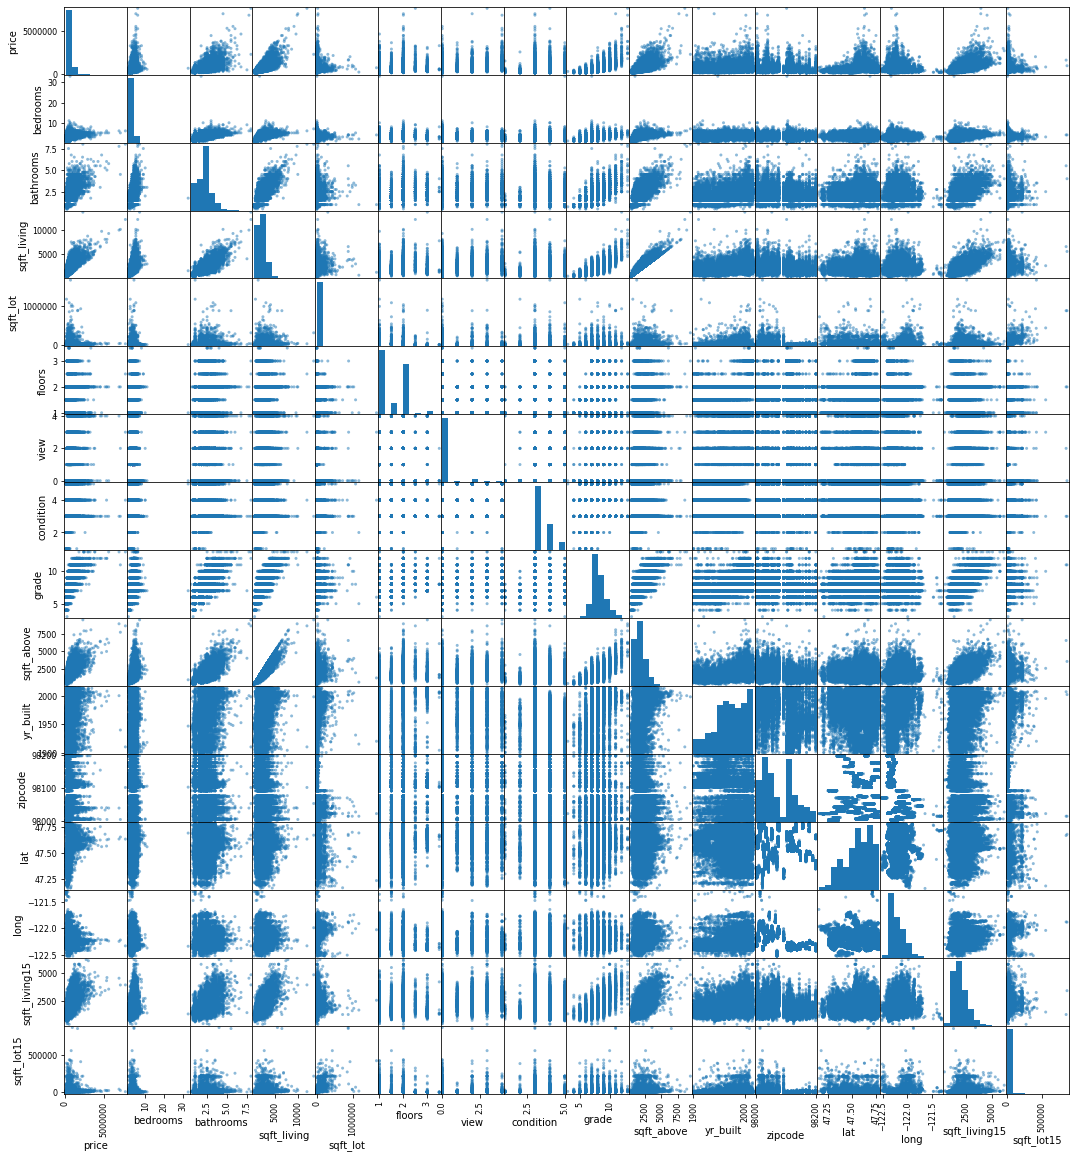

In [46]:
# Create scatter matrix to see if any numerical categorical values
pd.plotting.scatter_matrix(kings_county_sales_df, figsize=(18,20))

### Check for NULL values

In [22]:
kings_county_sales_df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

### Deal with null values

In [26]:
kings_county_sales_df['waterfront'].head()

id
7129300520    NaN
6414100192    0.0
5631500400    0.0
2487200875    0.0
1954400510    0.0
Name: waterfront, dtype: float64

In [27]:
kings_county_sales_df['waterfront'].value_counts(normalize=True, dropna=False)

0.0    0.883225
NaN    0.110015
1.0    0.006760
Name: waterfront, dtype: float64

In [28]:
# Goind to drop this column because it's messy and doesn't add much value to overall goal
kings_county_sales_df.drop(columns='waterfront', inplace=True)

In [29]:
kings_county_sales_df.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,,,,,,,,,,,,,,,,,,,
7129300520,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
6414100192,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
5631500400,2015-02-25,180000.0,2,1.00,770,10000,1.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
2487200875,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
1954400510,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [30]:
kings_county_sales_df['view'].value_counts(normalize=True, dropna=False)

0.0    0.899292
2.0    0.044312
3.0    0.023522
1.0    0.015280
4.0    0.014678
NaN    0.002917
Name: view, dtype: float64

In [35]:
# Most of these houses seem not to have a view. Therefore, I will replace null values with 0
kings_county_sales_df['view'].fillna(value=0, inplace=True)
kings_county_sales_df['view'].value_counts(normalize=True, dropna=False)


0.0    0.902209
2.0    0.044312
3.0    0.023522
1.0    0.015280
4.0    0.014678
Name: view, dtype: float64

In [36]:
kings_county_sales_df.isna().sum()

date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [40]:
kings_county_sales_df['yr_renovated'].value_counts(normalize=True, dropna=False)

0.0       0.787656
NaN       0.177895
2014.0    0.003380
2003.0    0.001435
2013.0    0.001435
            ...   
1944.0    0.000046
1948.0    0.000046
1976.0    0.000046
1934.0    0.000046
1953.0    0.000046
Name: yr_renovated, Length: 71, dtype: float64

In [41]:
# If you add up 0's and nulls, you will see that 90% of the data 
# in this column isn't available. Going to drop this column as well
kings_county_sales_df.drop(columns='yr_renovated', inplace=True)

In [42]:
kings_county_sales_df.isna().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [44]:
# We now got rid of all known null values. But we need to check that all the data still
# makes sense and all the values aren't 'hidden nulls'
#Going to look at min and max of all numeric columns
kings_county_sales_df.describe().round(2)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,view,condition,grade,sqft_above,yr_built,zipcode,lat,long,sqft_living15,sqft_lot15
count,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00,21597.00
mean,540296.57,3.37,2.12,2080.32,15099.41,1.49,0.23,3.41,7.66,1788.60,1971.00,98077.95,47.56,-122.21,1986.62,12758.28
std,367368.14,0.93,0.77,918.11,41412.64,0.54,0.76,0.65,1.17,827.76,29.38,53.51,0.14,0.14,685.23,27274.44
min,78000.00,1.00,0.50,370.00,520.00,1.00,0.00,1.00,3.00,370.00,1900.00,98001.00,47.16,-122.52,399.00,651.00
25%,322000.00,3.00,1.75,1430.00,5040.00,1.00,0.00,3.00,7.00,1190.00,1951.00,98033.00,47.47,-122.33,1490.00,5100.00
50%,450000.00,3.00,2.25,1910.00,7618.00,1.50,0.00,3.00,7.00,1560.00,1975.00,98065.00,47.57,-122.23,1840.00,7620.00
75%,645000.00,4.00,2.50,2550.00,10685.00,2.00,0.00,4.00,8.00,2210.00,1997.00,98118.00,47.68,-122.12,2360.00,10083.00
max,7700000.00,33.00,8.00,13540.00,1651359.00,3.50,4.00,5.00,13.00,9410.00,2015.00,98199.00,47.78,-121.32,6210.00,871200.00


In [48]:
kings_county_sales_df['yr_built'].value_counts(normalize=True, dropna=False)

2014    0.025883
2006    0.020975
2005    0.020836
2004    0.020049
2003    0.019447
          ...   
1933    0.001389
1901    0.001343
1902    0.001250
1935    0.001111
1934    0.000972
Name: yr_built, Length: 116, dtype: float64

### Identify outliers

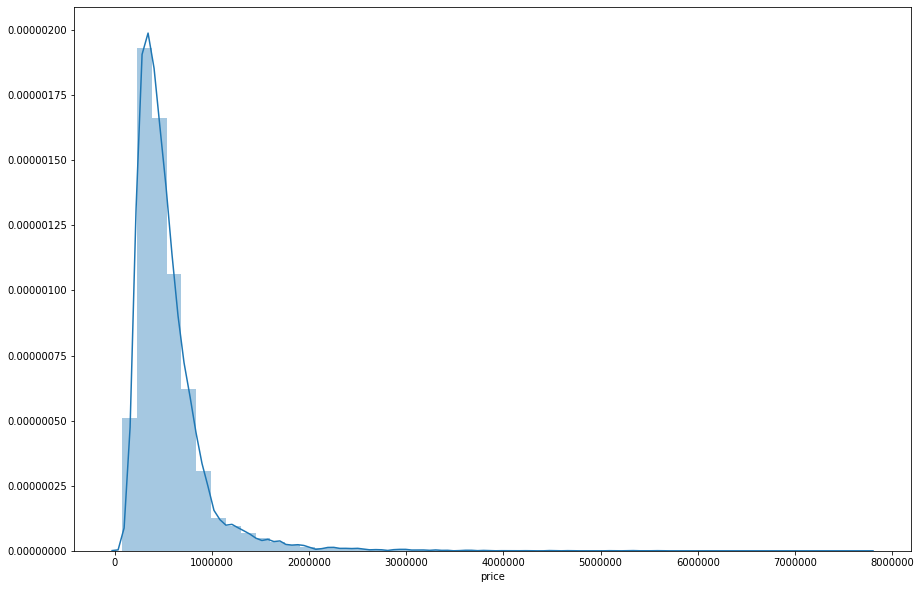

In [52]:
plt.rcParams['figure.figsize'] = (15,10)
target= 'price'
sns.distplot(kings_county_sales_df[target])

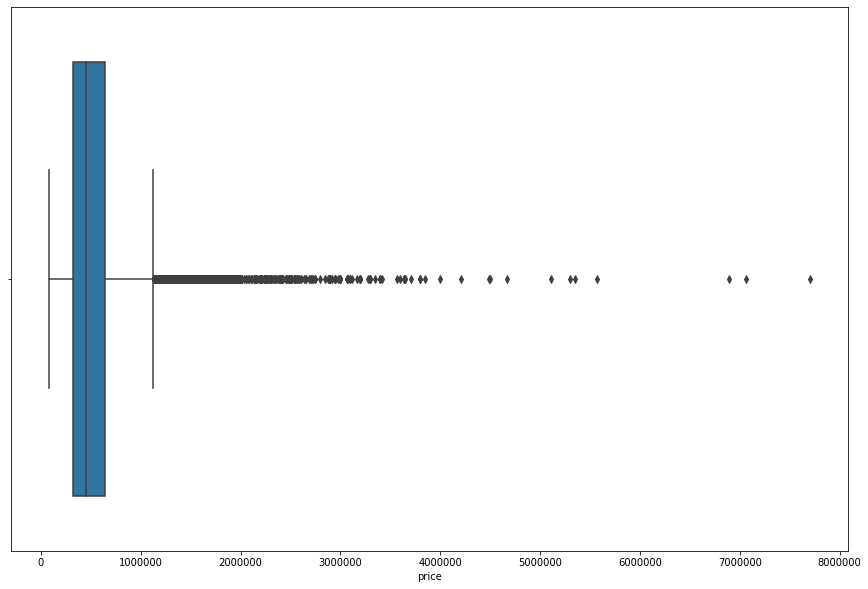

In [53]:
sns.boxplot(kings_county_sales_df[target])

> We see that there are many outliers for price column

### Check for multicollinearity

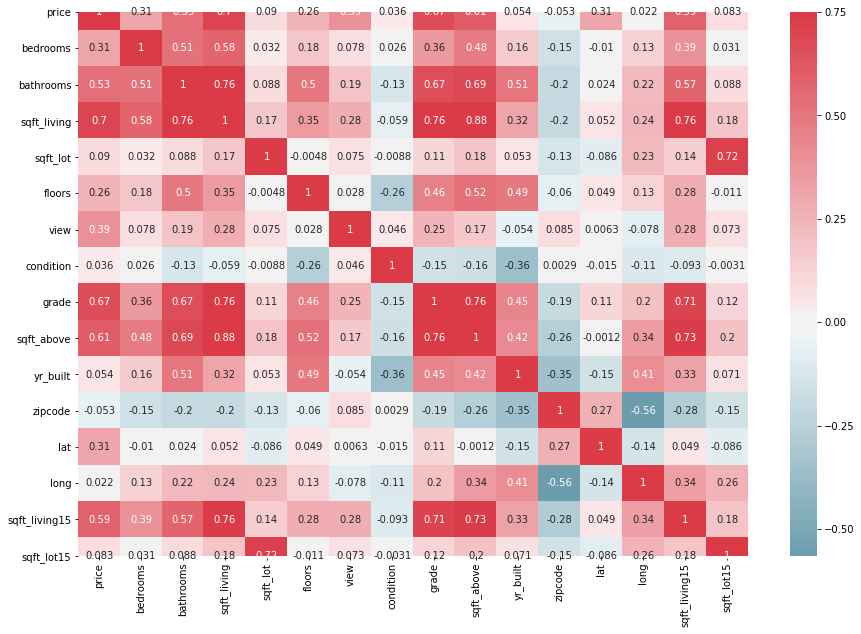

In [64]:
corr = kings_county_sales_df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)
sns.heatmap(corr, cmap=cmap, vmax=.75, center=0, annot=True)

### Multicolinearity found in following combinations:
* sqft_above and sqft_living

### Normalize data

# EXPLORE

# MODEL

# INTERPRET

# CONCLUSIONS & RECOMMENDATIONS

> Summarize your conclusions and bullet-point your list of recommendations, which are based on your modeling results.